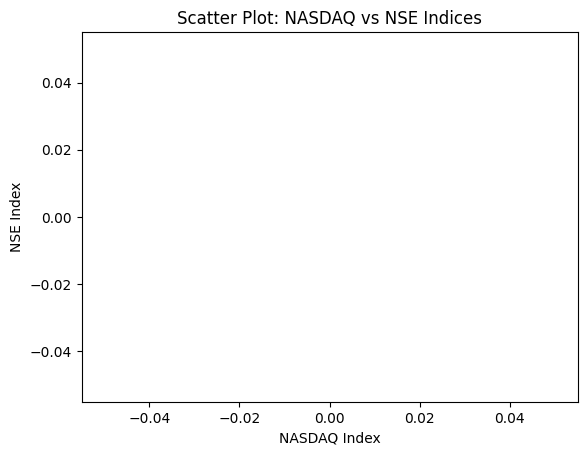

The correlation coefficient between NASDAQ and NSE indices is nan.
The relationship has a no correlation.
The relationship is no.


In [3]:
#TASK1
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Collect historical data for NASDAQ and NSE indices
nasdaq_ticker = yf.Ticker('^IXIC')
nse_ticker = yf.Ticker('^NSEI')

nasdaq_data = nasdaq_ticker.history(start='2010-05-01', end='2023-05-31')
nse_data = nse_ticker.history(start='2010-05-01', end='2023-05-31')

# Align the indices of the two datasets
nasdaq_data = nasdaq_data.reindex(nse_data.index)

# Step 2: Calculate the correlation coefficient
correlation_coefficient = nasdaq_data['Close'].corr(nse_data['Close'])

# Step 3: Analyze the strength and direction of the relationship
if correlation_coefficient > 0:
    strength = 'strong positive'
    direction = 'positive'
elif correlation_coefficient < 0:
    strength = 'strong negative'
    direction = 'negative'
else:
    strength = 'no'
    direction = 'no'

# Step 4: Plot a scatter plot to visualize the relationship
plt.scatter(nasdaq_data['Close'], nse_data['Close'])
plt.xlabel('NASDAQ Index')
plt.ylabel('NSE Index')
plt.title('Scatter Plot: NASDAQ vs NSE Indices')
plt.show()

print(f"The correlation coefficient between NASDAQ and NSE indices is {correlation_coefficient:.2f}.")
print(f"The relationship has a {strength} correlation.")
print(f"The relationship is {direction}.")


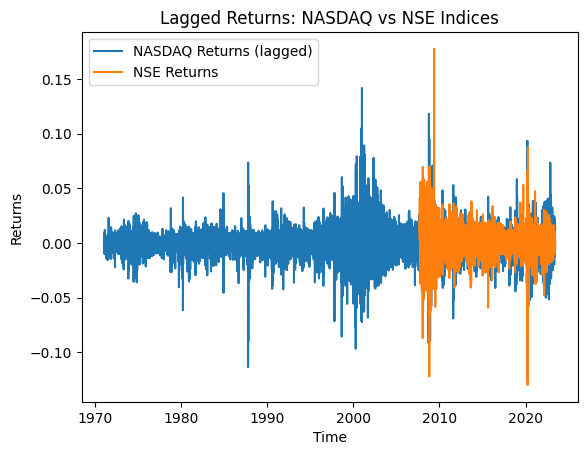

The correlation between lagged returns of NASDAQ and current returns of NSE is nan.
The lead-lag relationship suggests that No consistent lead-lag relationship.


In [4]:
#TASK2:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Collect historical data for NASDAQ and NSE indices
nasdaq_ticker = yf.Ticker('^IXIC')
nse_ticker = yf.Ticker('^NSEI')

nasdaq_data = nasdaq_ticker.history(period='max')
nse_data = nse_ticker.history(period='max')

# Step 2: Identify potential lead-lag relationships
# Calculate the percentage change in closing prices for each index
nasdaq_data['Returns'] = nasdaq_data['Close'].pct_change()
nse_data['Returns'] = nse_data['Close'].pct_change()

# Step 3: Analyze data for consistent leading or lagging behavior
# Calculate the correlation between the lagged returns of NASDAQ and current returns of NSE
lag = 1  # Define the lag period
correlation = nasdaq_data['Returns'].shift(-lag).corr(nse_data['Returns'])

if correlation > 0:
    relationship = 'NASDAQ leads NSE'
elif correlation < 0:
    relationship = 'NSE leads NASDAQ'
else:
    relationship = 'No consistent lead-lag relationship'

# Step 4: Plot the lagged returns to visualize the relationship
plt.plot(nasdaq_data['Returns'].shift(-lag), label='NASDAQ Returns (lagged)')
plt.plot(nse_data['Returns'], label='NSE Returns')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Lagged Returns: NASDAQ vs NSE Indices')
plt.legend()
plt.show()

print(f"The correlation between lagged returns of NASDAQ and current returns of NSE is {correlation:.2f}.")
print(f"The lead-lag relationship suggests that {relationship}.")


In [14]:
pip install ta


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


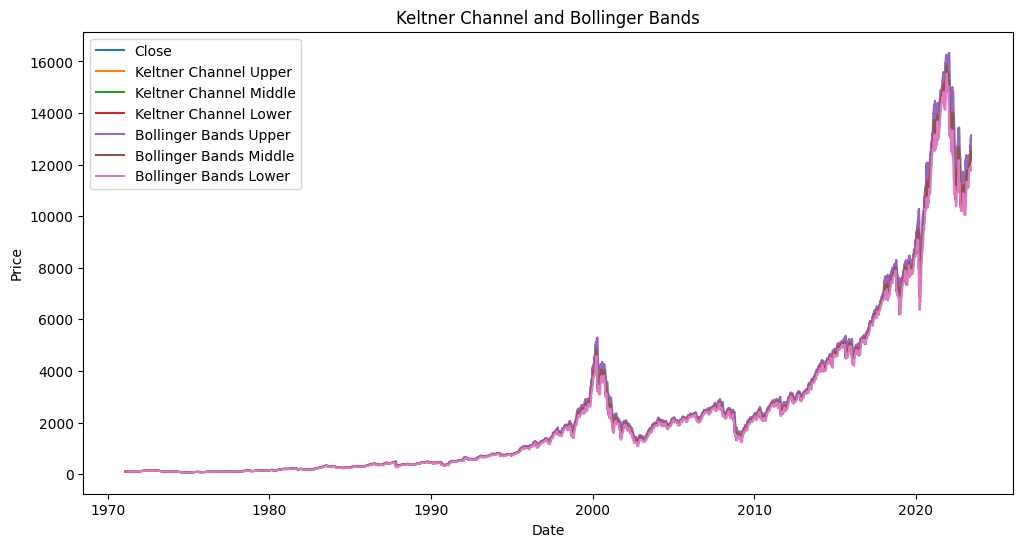

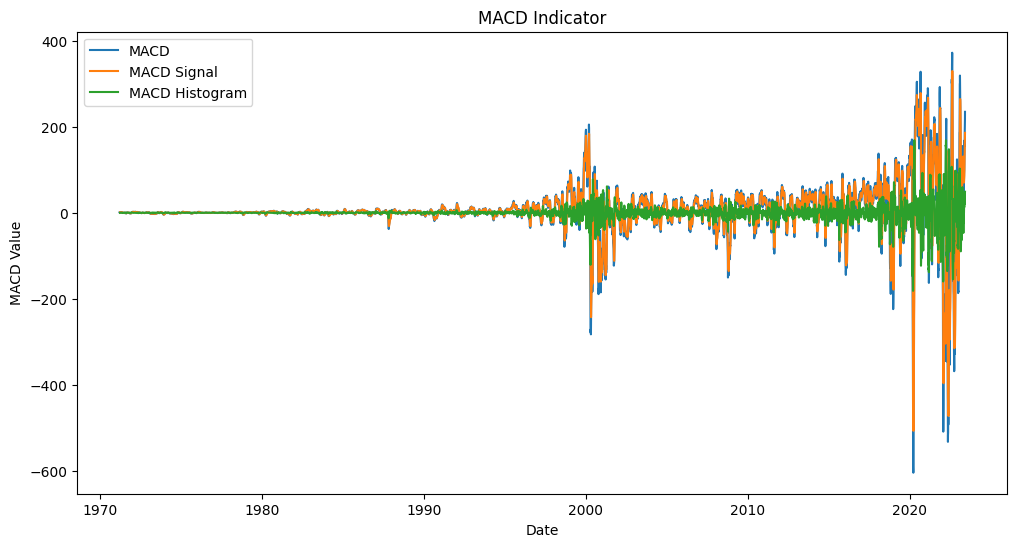

In [11]:
#TASK 3
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from ta.volatility import KeltnerChannel
from ta.volatility import BollingerBands
from ta.trend import MACD

# Step 1: Collect historical data for an index
index_ticker = yf.Ticker('^IXIC')  # Change to the desired index ticker
index_data = index_ticker.history(period='max')

# Step 2: Calculate Keltner Channel
kc = KeltnerChannel(index_data['High'], index_data['Low'], index_data['Close'], window=20, window_atr=10)
index_data['KC_Upper'] = kc.keltner_channel_hband()
index_data['KC_Middle'] = kc.keltner_channel_mband()
index_data['KC_Lower'] = kc.keltner_channel_lband()

# Step 3: Calculate Bollinger Bands
bb = BollingerBands(index_data['Close'], window=20, window_dev=2)
index_data['BB_Upper'] = bb.bollinger_hband()
index_data['BB_Middle'] = bb.bollinger_mavg()
index_data['BB_Lower'] = bb.bollinger_lband()

# Step 4: Calculate MACD
macd = MACD(index_data['Close'])
index_data['MACD'] = macd.macd()
index_data['MACD_Signal'] = macd.macd_signal()
index_data['MACD_Hist'] = macd.macd_diff()

# Step 5: Plotting the indicators
plt.figure(figsize=(12, 6))
plt.plot(index_data['Close'], label='Close')
plt.plot(index_data['KC_Upper'], label='Keltner Channel Upper')
plt.plot(index_data['KC_Middle'], label='Keltner Channel Middle')
plt.plot(index_data['KC_Lower'], label='Keltner Channel Lower')
plt.plot(index_data['BB_Upper'], label='Bollinger Bands Upper')
plt.plot(index_data['BB_Middle'], label='Bollinger Bands Middle')
plt.plot(index_data['BB_Lower'], label='Bollinger Bands Lower')
plt.legend()
plt.title('Keltner Channel and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(index_data['MACD'], label='MACD')
plt.plot(index_data['MACD_Signal'], label='MACD Signal')
plt.plot(index_data['MACD_Hist'], label='MACD Histogram')
plt.legend()
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.show()


In [18]:
#TASK4

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Collect historical data for an index
index_ticker = yf.Ticker('^IXIC')  # Change to the desired index ticker
index_data = index_ticker.history(period='max')

# Step 2: Define the parameter ranges to optimize
parameter_ranges = {
    'kc_timeperiod': range(10, 31, 5),
    'bb_timeperiod': range(10, 31, 5),
    'macd_fastperiod': range(10, 31, 5),
    'macd_slowperiod': range(30, 61, 5),
    'macd_signalperiod': range(5, 21, 5)
}

# Step 3: Perform parameter optimization
best_parameters = None
best_metric = float('-inf')

for kc_timeperiod in parameter_ranges['kc_timeperiod']:
    for bb_timeperiod in parameter_ranges['bb_timeperiod']:
        for macd_fastperiod in parameter_ranges['macd_fastperiod']:
            for macd_slowperiod in parameter_ranges['macd_slowperiod']:
                for macd_signalperiod in parameter_ranges['macd_signalperiod']:
                    strategy_data = index_data.copy()

                    # Calculate Keltner Channel with current parameters
                    strategy_data['KC_Middle'] = strategy_data['Close'].rolling(window=kc_timeperiod).mean()
                    strategy_data['KC_ATR'] = strategy_data['High'] - strategy_data['Low']
                    strategy_data['KC_Upper'] = strategy_data['KC_Middle'] + (2 * strategy_data['KC_ATR'])
                    strategy_data['KC_Lower'] = strategy_data['KC_Middle'] - (2 * strategy_data['KC_ATR'])

                    # Calculate Bollinger Bands with current parameters
                    strategy_data['BB_Middle'] = strategy_data['Close'].rolling(window=bb_timeperiod).mean()
                    strategy_data['BB_STD'] = strategy_data['Close'].rolling(window=bb_timeperiod).std()
                    strategy_data['BB_Upper'] = strategy_data['BB_Middle'] + (2 * strategy_data['BB_STD'])
                    strategy_data['BB_Lower'] = strategy_data['BB_Middle'] - (2 * strategy_data['BB_STD'])

                    # Calculate MACD with current parameters
                    strategy_data['MACD_Line'] = strategy_data['Close'].ewm(span=macd_fastperiod).mean() - strategy_data['Close'].ewm(span=macd_slowperiod).mean()
                    strategy_data['MACD_Signal'] = strategy_data['MACD_Line'].ewm(span=macd_signalperiod).mean()
                    strategy_data['MACD_Hist'] = strategy_data['MACD_Line'] - strategy_data['MACD_Signal']

                    # Evaluate the strategy performance using a metric (e.g., cumulative returns)
                    strategy_returns = strategy_data['Close'].pct_change().fillna(0)
                    cumulative_returns = (1 + strategy_returns).cumprod()
                    metric = cumulative_returns.iloc[-1]

                    # Update the best parameters and metric if the current combination is better
                    if metric > best_metric:
                        best_parameters = {
                            'kc_timeperiod': kc_timeperiod,
                            'bb_timeperiod': bb_timeperiod,
                            'macd_fastperiod': macd_fastperiod,
                            'macd_slowperiod': macd_slowperiod,
                            'macd_signalperiod': macd_signalperiod
                        }
                        best_metric = metric

# Step 4: Print the best parameters and


                                Close    KC_Upper    KC_Lower  Signal  \
Date                                                                    
1980-12-12 00:00:00-05:00    0.099584         NaN         NaN       0   
1980-12-15 00:00:00-05:00    0.094388         NaN         NaN       0   
1980-12-16 00:00:00-05:00    0.087461         NaN         NaN       0   
1980-12-17 00:00:00-05:00    0.089625         NaN         NaN       0   
1980-12-18 00:00:00-05:00    0.092224         NaN         NaN       0   
...                               ...         ...         ...     ...   
2023-05-25 00:00:00-04:00  172.990005  177.439986  168.600020       0   
2023-05-26 00:00:00-04:00  175.429993  178.626009  167.985994       0   
2023-05-30 00:00:00-04:00  177.300003  178.668997  168.989005       0   
2023-05-31 00:00:00-04:00  177.250000  179.527023  169.166977       0   
2023-06-01 00:00:00-04:00  180.089996  181.467004  168.706995       0   

                            Returns  Cumulative_Re

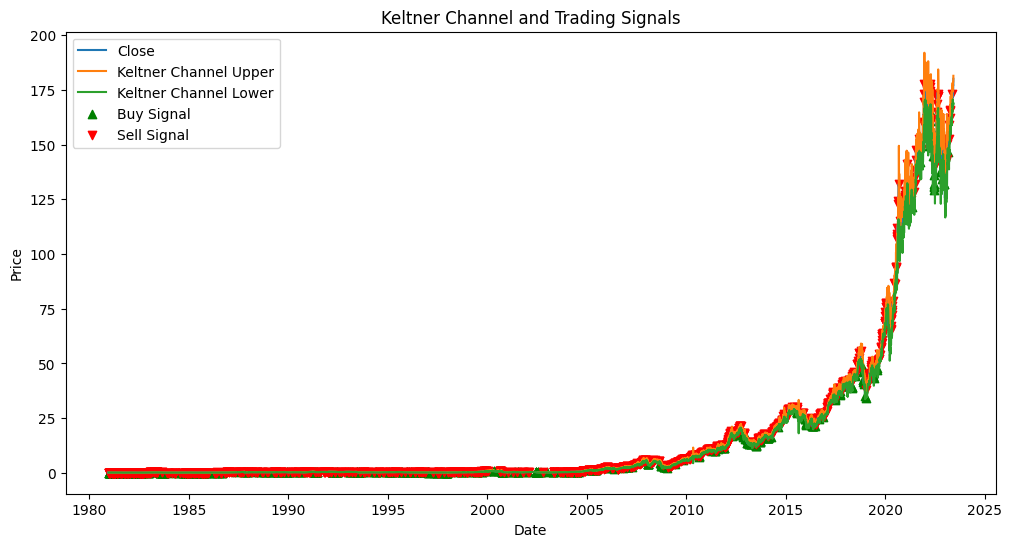

In [21]:
#TASK5

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Collect historical data for another index
index_ticker = yf.Ticker('AAPL')  # Change to the desired index ticker
index_data = index_ticker.history(period='max')

# Step 2: Apply the optimized parameters
kc_timeperiod = best_parameters['kc_timeperiod']
bb_timeperiod = best_parameters['bb_timeperiod']
macd_fastperiod = best_parameters['macd_fastperiod']
macd_slowperiod = best_parameters['macd_slowperiod']
macd_signalperiod = best_parameters['macd_signalperiod']

# Calculate Keltner Channel with optimized parameters
index_data['KC_Middle'] = index_data['Close'].rolling(window=kc_timeperiod).mean()
index_data['KC_ATR'] = index_data['High'] - index_data['Low']
index_data['KC_Upper'] = index_data['KC_Middle'] + (2 * index_data['KC_ATR'])
index_data['KC_Lower'] = index_data['KC_Middle'] - (2 * index_data['KC_ATR'])

# Calculate Bollinger Bands with optimized parameters
index_data['BB_Middle'] = index_data['Close'].rolling(window=bb_timeperiod).mean()
index_data['BB_STD'] = index_data['Close'].rolling(window=bb_timeperiod).std()
index_data['BB_Upper'] = index_data['BB_Middle'] + (2 * index_data['BB_STD'])
index_data['BB_Lower'] = index_data['BB_Middle'] - (2 * index_data['BB_STD'])

# Calculate MACD with optimized parameters
index_data['MACD_Line'] = index_data['Close'].ewm(span=macd_fastperiod).mean() - index_data['Close'].ewm(span=macd_slowperiod).mean()
index_data['MACD_Signal'] = index_data['MACD_Line'].ewm(span=macd_signalperiod).mean()
index_data['MACD_Hist'] = index_data['MACD_Line'] - index_data['MACD_Signal']

# Step 3: Generate buy and sell signals
index_data['Signal'] = 0
index_data.loc[index_data['Close'] > index_data['KC_Upper'], 'Signal'] = -1  # Sell signal
index_data.loc[index_data['Close'] < index_data['KC_Lower'], 'Signal'] = 1  # Buy signal

# Step 4: Record the signals, dates, returns, and metrics
index_data['Returns'] = index_data['Close'].pct_change()
index_data['Cumulative_Returns'] = (1 + index_data['Returns']).cumprod()
index_data['Trade_Returns'] = index_data['Signal'].shift() * index_data['Returns']
index_data['Cumulative_Trade_Returns'] = (1 + index_data['Trade_Returns']).cumprod()

# Step 5: Print the generated signals and metrics
print(index_data[['Close', 'KC_Upper', 'KC_Lower', 'Signal', 'Returns', 'Cumulative_Returns', 'Trade_Returns', 'Cumulative_Trade_Returns']])


# Step 6: Plotting the indicators and signals
plt.figure(figsize=(12, 6))
plt.plot(index_data['Close'], label='Close')
plt.plot(index_data['KC_Upper'], label='Keltner Channel Upper')
plt.plot(index_data['KC_Lower'], label='Keltner Channel Lower')

# Create a signal DataFrame with the same index as index_data
signal_data = pd.DataFrame(index=index_data.index)
signal_data['Signal'] = 0
signal_data.loc[index_data['Close'] > index_data['KC_Upper'], 'Signal'] = -1  # Sell signal
signal_data.loc[index_data['Close'] < index_data['KC_Lower'], 'Signal'] = 1  # Buy signal

# Plot the signals at the corresponding dates
buy_signals = signal_data[signal_data['Signal'] == 1]
sell_signals = signal_data[signal_data['Signal'] == -1]
plt.scatter(buy_signals.index, index_data.loc[buy_signals.index, 'Close'], color='green', marker='^', label='Buy Signal')
plt.scatter(sell_signals.index, index_data.loc[sell_signals.index, 'Close'], color='red', marker='v', label='Sell Signal')

plt.legend()
plt.title('Keltner Channel and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

